<a href="https://colab.research.google.com/github/jeeva9656/pde-code/blob/main/Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Applications of Laplace Transform
The true power of the Laplace Transform in engineering is its ability to convert complex differential equations (in the time domain) into simple algebraic equations (in the
-domain). This experiment demonstrates this powerful technique.

## Solving Differential Equations with Laplace Transforms

## Aim
To solve an ordinary differential equation (ODE) using the Laplace Transform method and to visualize the resulting solution.

## Objectives
- To understand the process of transforming an entire ODE into the s-domain.
- To solve for the system’s response algebraically in the s-domain.
- To use the Inverse Laplace Transform to bring the solution back into the time domain.
- To obtain and visualize both the symbolic and numerical solutions.
## Algorithm: The Laplace Transform Method for ODEs
The process follows a clear, three-step “detour” through the s-domain:

1. Transform: Take the Laplace Transform of every term in the differential equation. Use the transform properties for derivatives:

$\mathcal{L}\{y'(t)\} = sY(s) - y(0)$
$\mathcal{L}\{y''(t)\} = s^2Y(s) - sy(0) - y'(0)$This step converts the ODE into an algebraic equation in terms of$Y(s)$ automatically incorporating the initial conditions.

2. Solve Algebraically: Rearrange the resulting algebraic equation to solve for$Y(s)$.This$Y(s)$is the Laplace Transform of the solution to the ODE.

3. Inverse Transform: Apply the Inverse Laplace Transform to$Y(s)$to find the final solution,$y(t) = \mathcal{L}^{-1}\{Y(s)\}$.

This method elegantly bypasses the need for finding homogeneous and particular solutions, as is done in traditional time-domain methods.

## Case Study: First-Order RC Circuit Model

Problem: Using the Laplace Transform, find the solution of the differential equation$y' + y = 1$with the initial condition $y(0)=0$.This equation models the voltage across a capacitor in a simple RC circuit (with R=1, C=1) connected to a 1V DC source.

Step-by-Step Solution:

1. Transform the ODE:

$\mathcal{L}\{y'(t)\} + \mathcal{L}\{y(t)\} = \mathcal{L}\{1\}$
$\left[ sY(s) - y(0) \right] + Y(s) = \frac{1}{s}$

2. Incorporate Initial Conditions and Solve for Y(s):

- since $y(0)=0$ the equation becomes: $sY(s) + Y(s) = \frac{1}{s}$
- Factor out $Y(s)(s + 1) = \frac{1}{s}$
- solve for $Y(s) = \frac{1}{s(s+1)}$

3. Inverse Transform:

- Find $y(t) = \mathcal{L}^{-1}\left\{\frac{1}{s(s+1)}\right\}$ This can be done using partial fraction expansion, yielding $y(t) = 1 - e^{-t}$.

Let’s verify this process using Python.



The symbolic solution is:


Eq(y(t), 1 - exp(-t))

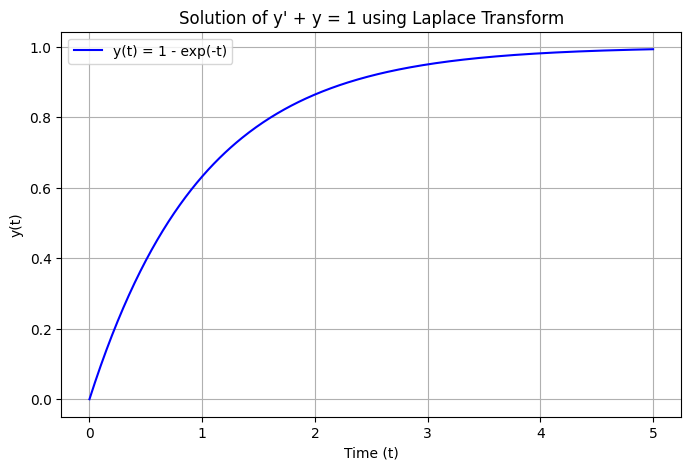

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Symbols and the ODE ---
t = sp.Symbol('t', positive=True)
s = sp.Symbol('s')
y = sp.Function('y')

# Define the differential equation: y'(t) + y(t) - 1 = 0
ode = y(t).diff(t) + y(t) - 1

# --- 2. Solve directly using SymPy's dsolve with Laplace method ---
# This automates the transform, solve, and inverse transform steps.
# We provide the initial condition y(0)=0 via the 'ics' argument.
solution = sp.dsolve(ode, ics={y(0): 0})

# Display the symbolic solution
print("The symbolic solution is:")
display(solution)
y_t = solution.rhs # Extract the right-hand side for plotting

# --- 3. Visualize the Solution ---
# Convert the symbolic solution into a numerical function for plotting
y_func = sp.lambdify(t, y_t, modules=['numpy'])

# Generate time values for the plot
t_vals = np.linspace(0, 5, 400)
y_vals = y_func(t_vals)

# Plot the result
plt.figure(figsize=(8, 5))
plt.plot(t_vals, y_vals, label=f"y(t) = {y_t}", color='blue')
plt.title("Solution of y' + y = 1 using Laplace Transform")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()
plt.show()

##  Result and Discussion
The solution obtained is $y(t)=1−e^{−t}$The visualization confirms the behavior described by this function: The solution curve starts at the point $(0,0)$ satisfying the initial condition $y(0)=0$. As time t increases, the exponential term $e^{−t}$ecays towards zero. Consequently, the solution $y(t)$ asymptotically approaches the value of 1, which is the steady-state response of the system. This behavior is characteristic of a first-order system (like an RC circuit) responding to a step input.